Datos de NBA


In [ ]:
url= 'https://docs.google.com/spreadsheets/d/1O-ZhqONjX91MQbqZk8AQ_NxzN6Xkk0ZhdKYvXA1q6QA/edit?usp=sharing'

!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install dash

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd '/content/drive/MyDrive'

df = pd.read_csv('nba_stats.csv')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 22.4 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.7
    Uninstalling Werkzeug-2.3.7:
      Successfully uninstalled Werkzeug-2.3.7


In [ ]:
#Primero veo que posiciones están en el dataset
print(df['Pos'].unique())
multi_pos_plyrs = df[~df['Pos'].isin(['SG','PG','PF','SF','C'])]
print(len(multi_pos_plyrs['Pos'].dropna()))
print(df.columns)

['SG' 'PF' 'C' 'PG' 'SF' nan 'SF-SG' 'PG-SG' 'PF-SF' 'SG-PF' 'C-PF'
 'SG-SF' 'PF-C' 'SF-C' 'SF-PF' 'SG-PG' 'SG-PG-SF']
61
Index(['Unnamed: 0', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'season', '3PAr', 'AST%', 'BLK%', 'BPM', 'DBPM', 'DRB%', 'DWS',
       'FTr', 'OBPM', 'ORB%', 'OWS', 'PER', 'STL%', 'TOV%', 'TRB%', 'TS%',
       'USG%', 'VORP', 'WS', 'WS/48'],
      dtype='object')


In [ ]:
single_pos_plyrs = df[df['Pos'].isin(['SG','PG','PF','SF','C'])]

Histograma de Puntos por Numero de Jugadores

0        4.7
1        5.9
2       13.9
3        6.9
4        3.4
        ... 
4374     4.4
4375    26.2
4376     4.4
4377     6.5
4378    10.8
Name: PTS, Length: 4379, dtype: float64


<Figure size 800x600 with 0 Axes>

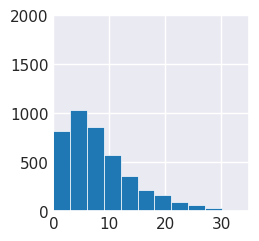

In [ ]:

plt.figure(figsize=(8, 6))
plt.style.use('_mpl-gallery')


x = df['PTS']
print(x)
# plot:
fig, ax = plt.subplots()

ax.hist(x, bins=12, linewidth=0.5, edgecolor="white")

ax.set(xlim=(0, 35),
       ylim=(0, 2000))

plt.show()


Ratio entre Bloqueos y Robos por la cantidad de Faltas Personas.


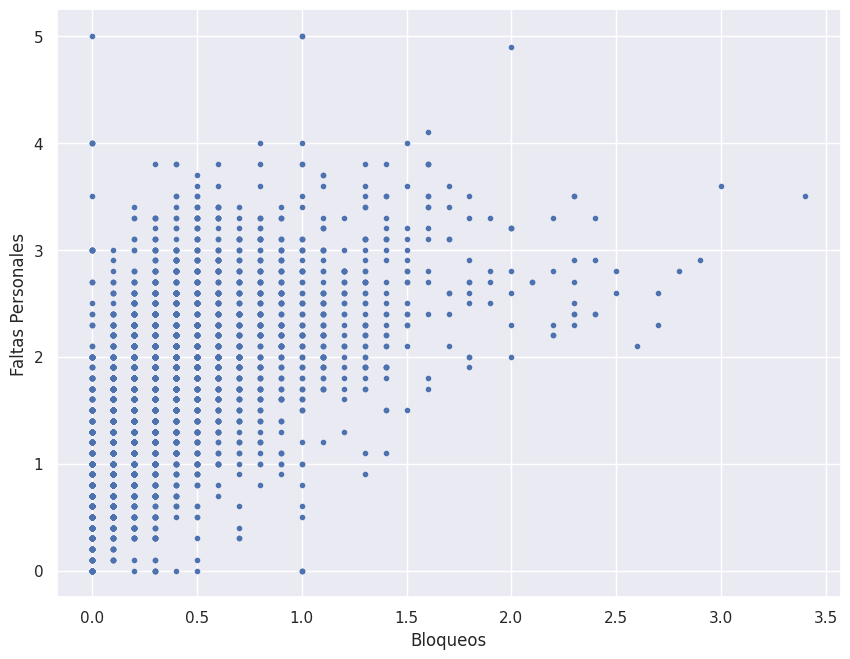

In [ ]:

blocks_stats = df.filter(items=['BLK', 'PF'])



plt.figure(figsize=(8, 6))
plt.scatter('BLK','PF', data=blocks_stats, marker="." )
plt.xlabel('Bloqueos')
plt.ylabel('Faltas Personales')
plt.show()

<Axes: xlabel='STL', ylabel='PF'>

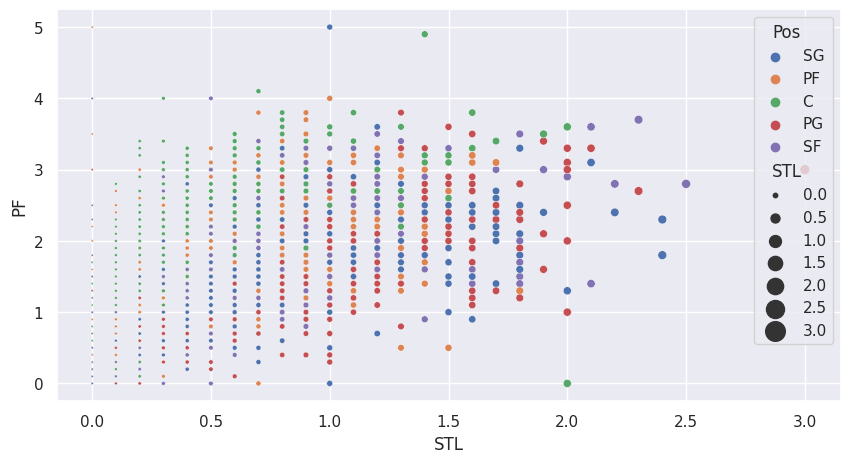

In [ ]:
sns.set(rc={"figure.figsize":(8, 4)})
steal_stats = single_pos_plyrs.filter(items=['STL','PF', 'Pos'])

sns.scatterplot(data=steal_stats, x='STL', y='PF', marker=".", hue='Pos', size='STL', sizes=(10, 200))

Gráfico Boxplot de Centros en 7 Cátegorías

['SG' 'PF' 'C' 'PG' 'SF' nan 'SF-SG' 'PG-SG' 'PF-SF' 'SG-PF' 'C-PF'
 'SG-SF' 'PF-C' 'SF-C' 'SF-PF' 'SG-PG' 'SG-PG-SF']
      STL   PF Pos   FG  TRB   AST   3P  BLK
8     0.2  0.8  PG  0.3  0.6   0.7  0.0  0.1
18    0.5  0.8  PG  0.7  1.0   1.5  0.4  0.0
26    0.7  1.3  PG  3.3  2.1   3.8  1.5  0.0
32    0.3  1.7  PG  2.0  1.1   0.7  0.6  0.1
33    1.7  2.3  PG  3.9  6.9   7.2  1.7  0.8
...   ...  ...  ..  ...  ...   ...  ...  ...
4343  1.1  2.0  PG  6.1  4.9   7.6  1.2  0.5
4350  0.0  1.0  PG  2.6  1.0   2.0  0.9  0.3
4371  1.8  1.2  PG  2.8  3.6   3.9  0.8  0.3
4372  0.3  0.9  PG  1.7  1.7   2.1  0.3  0.2
4375  1.1  1.4  PG  8.2  3.0  10.2  2.1  0.1

[789 rows x 8 columns]
Axes(0.01,0.01;0.98x0.98)


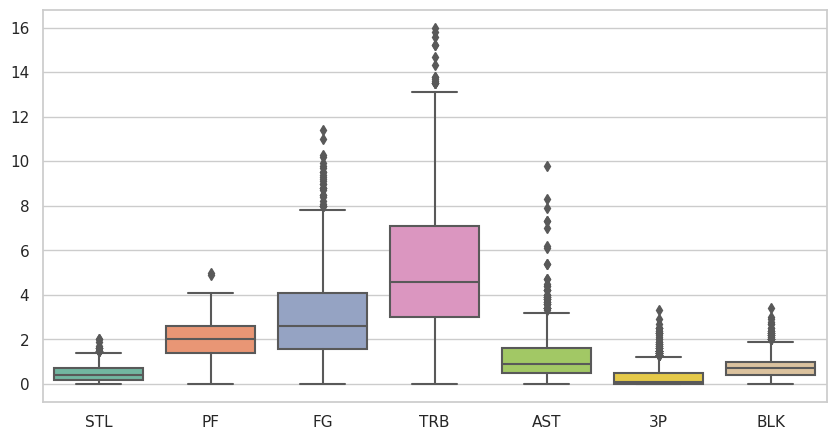

In [ ]:
stats_sevencat= df.filter(items=['STL','PF', 'Pos','FG','TRB', 'AST', '3P', 'BLK'])
stats_sevencatbypos= stats_sevencat.groupby('Pos')

sns.set_style('whitegrid')
sns.set_palette('Set2')
print(stats_sevencat['Pos'].unique())
print(stats_sevencat[stats_sevencat['Pos'] == 'PG'])

print(sns.boxplot(stats_sevencat[stats_sevencat['Pos']== 'C']) )

Gráfico Boxplot de Point Guards en 7 Cátegorías


<Axes: >

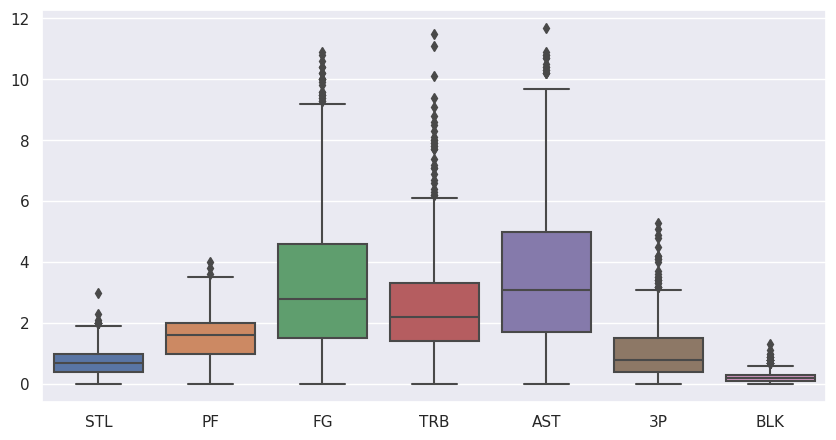

In [ ]:
sns.boxplot(stats_sevencat[stats_sevencat['Pos']== 'PG'])

Estadísticas Promedio de un Centro en 7 Cátegorías

          STL        PF        FG      TRB       AST        3P       BLK  \
Pos                                                                        
C    0.484433  1.976339  3.076463  5.32528  1.230012  0.348817  0.748692   

          PTS         MP  
Pos                       
C    7.852304  17.504234  


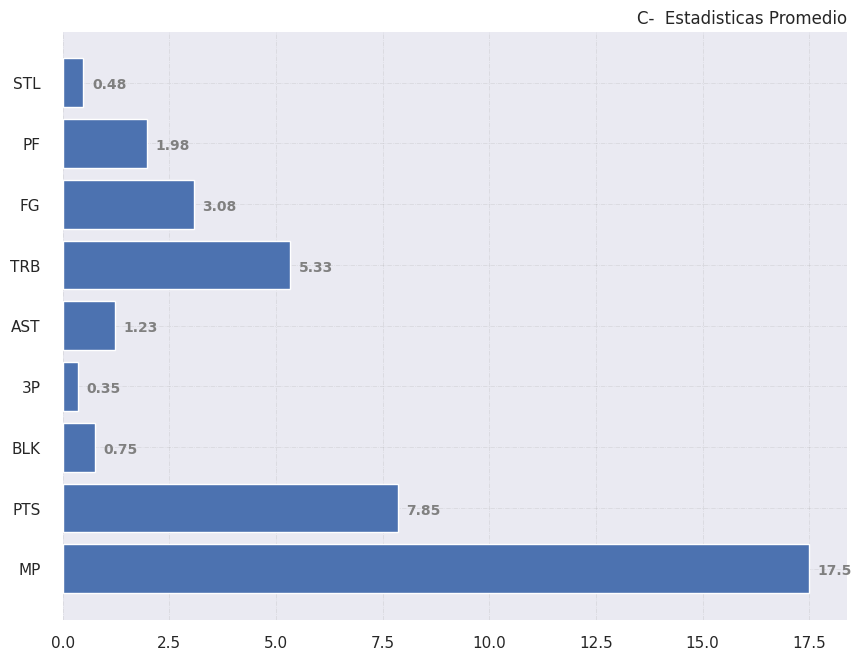

In [ ]:
stats_eightncat= single_pos_plyrs.filter(items=['STL','PF', 'Pos','FG','TRB', 'AST', '3P', 'BLK', 'PTS', 'MP'])
mean_8cat = stats_eightncat.groupby('Pos').mean()

fig, ax = plt.subplots(figsize =(8,6))


print(mean_8cat.iloc[mean_8cat.index == 'C'])

center_stats = mean_8cat.iloc[0]
stats_names = mean_8cat.columns

ax.barh(stats_names, center_stats)
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid( color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title('%s-  Estadisticas Promedio'%(mean_8cat.index[0]),
             loc ='right', )



# Show Plot
plt.show()


Puntos de 3 por Temporada

<Axes: xlabel='season', ylabel='PTS'>

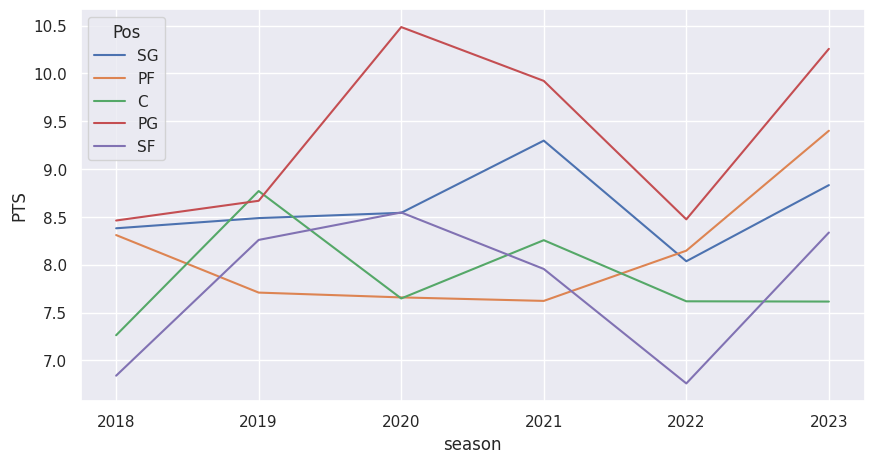

In [ ]:
sns.lineplot(data= single_pos_plyrs, x='season', y='PTS' ,hue='Pos', err_style=None)